# K Means Clustering

The number of clusters $K$ is fixed. The aim is to find cluster centres $\boldsymbol{\mu}_1, \ldots, \boldsymbol{\mu}_K$ such that the sum of the squared distances of each data sample to its nearest cluster centre (the one it is assigned to) is minimal.

As cluster centres move around, for each sample it changes which is the nearest cluster. The algorithm finds an approximate solution by separating this interdependency with the introduction of hidden (latent) variables $\mathbf{z}_n$, one for each data sample $\mathbf{v}_n$. The latent variables are binary vectors, i.e. $\mathbf{z}_n \in \{ 0,1 \}^K$, where only one entry can be $1$ and the others have to be $0$. This is known as a 1-of-$K$ representation.

The objective function to minimize is
\begin{equation}
J = \sum_{n=1}^N \sum_{k=1}^K z_{n,k} \| \mathbf{v}_n - \boldsymbol{\mu}_k \|^2.
\end{equation}
This is quadratic in $\boldsymbol{\mu}_k$. The minimum is found by differentiating with respect to $\boldsymbol{\mu}_k$ for each $k$.

This gives new centre locations for all $k$
\begin{equation}
\boldsymbol{\mu}_k = \frac{\sum_{n=1}^N z_{n,k} \mathbf{v}_n} {\sum_{n=1}^N z_{n,k}}.
\end{equation}
However, now that the centres have moved, the indicator vectors $\mathbf{z_n}$ have to be adjusted. This can be viewed as minimizing $J$ with respect to all $\mathbf{z}_n$.

The algorithm alternates between moving the centres $\boldsymbol{\mu}_k$ and recalculating $\mathbf{z}_n$. It terminates, when after moving the centres, none of the indicator vectors changes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.cluster import KMeans


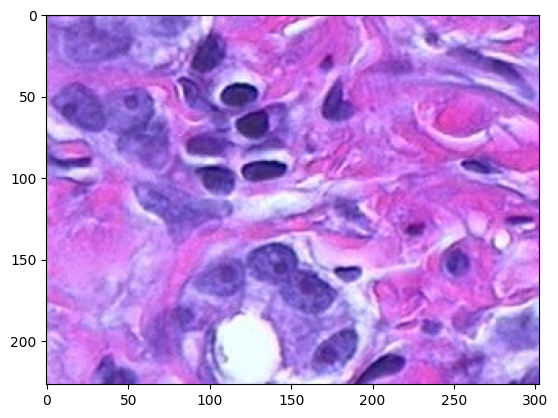

In [2]:
img = imread('hestain.png')
plt.imshow(img)
plt.show()

In [3]:
# Find original dimensions
w, h, d = tuple(img.shape)
# Reshape into one vector of colour tuples.
l = w*h
img_array = np.reshape(img, (l, d))

# Number of clusters:
nc = 3
# Run K-means algorithm.
kmeans = KMeans(n_clusters=nc).fit(img_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


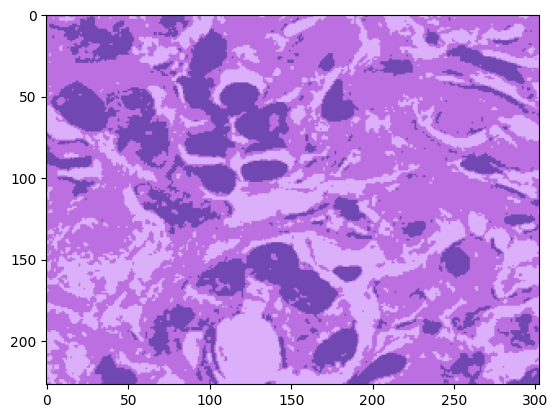

In [4]:
segmented = np.zeros((l,3))
for i in range(0,nc):
  segmented[kmeans.labels_ == i, :] = np.repeat(
      np.atleast_2d(kmeans.cluster_centers_[i,:]),
      segmented[kmeans.labels_ == i,:].shape[0],
      axis =0)
segmented_img = np.reshape(segmented,(w,h,d))
plt.imshow(segmented_img)
plt.show()